# Codealong 07

Notes: logit function: y = ln(p/(1-p)) <br>
Can then run logistic regression on y instead of p, and can convert back and forth <br>
e^(Bj) = odds of being in category j <br>
p = e^y / (1+e^y)

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 2

In [2]:
df = pd.read_csv(os.path.join('iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and label vector

In [4]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [5]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Activity: Create dummy variables for the outcome variable

In [6]:
ys = pd.get_dummies(df.Species, prefix=None)

In [7]:
ys

,Setosa,Versicolor,Virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


## Activity: Run logistic regression to learn whether or not an iris plant is a Setosa

In [8]:
model_Setosa = linear_model.LogisticRegression()
model_Setosa.fit(X,ys.Setosa)
print model_Setosa.coef_
print model_Setosa.intercept_
print 2.72**model_Setosa.coef_

[[ 0.41498833  1.46129739 -2.26214118 -1.0290951 ]]
[ 0.26560617]
[[ 1.51475022  4.31553263  0.10397856  0.35709788]]


## Activity: What's the accuracy of your model?

In [9]:
model_Setosa.score(X,ys.Setosa)

1.0

## Activity: Plot the log odds (that it is a Setosa) for each plant in the dataset

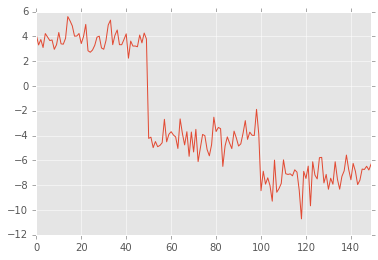

In [10]:
y_logit_Setosa = model_Setosa.intercept_ + (X * model_Setosa.coef_[0]).sum(axis = 1)
y_logit_Setosa.plot()

If y_logit >= 0, then the probability of being classified is greater than 50% because the odds ratio is 1 since e^0 = 1. So y > 0 means it is in class 1

## Activity: Using just the log odds, confirm the model accuracy

In [11]:
((y_logit_Setosa >= 0) == (ys.Setosa == 1)).sum() / len(ys.Setosa)
# or ((y_logit_Setosa >= 0) == (ys.Setosa == 1)).mean()

1

## Activity: Plot the odds (that it is a Setosa) for each plant in the dataset

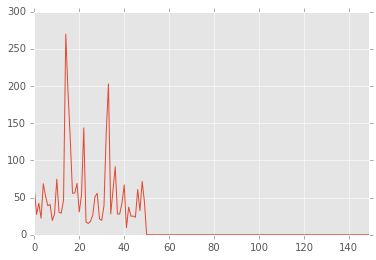

In [12]:
y_odds_Setosa = np.exp(y_logit_Setosa)
y_odds_Setosa.plot()

## Activity: Now, using just the odds, confirm the model accuracy

In [13]:
((y_odds_Setosa >= 1) == (ys.Setosa == 1)).mean()

1.0

## Activity: Plot the class probabilities (that it is a Setosa) for each plant in the dataset

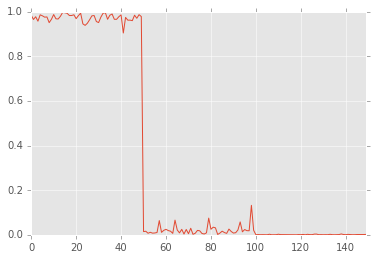

In [16]:
y_p_Setosa = y_odds_Setosa / (1 + y_odds_Setosa)
y_p_Setosa.plot() #Convincing model since the values are near either 1 or 0 and not hovering around 0.5

## Activity: Using the class probabilities, confirm for the last time the model accuracy

In [17]:
((y_p_Setosa >= 0.5) == (ys.Setosa == 1)).mean()

1.0

## Activity: Finally, compute the outcome class for the Setosa model and verify the model accuracy

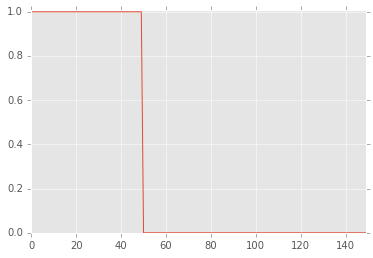

In [24]:
y_class_Setosa = y_p_Setosa.round()
y_class_Setosa.plot(ylim = (0,1.01))

## Versicolor

### Activity

In [26]:
model_Versicolor = linear_model.LogisticRegression()
model_Versicolor.fit(X,ys.Versicolor)
print model_Versicolor.coef_
print model_Versicolor.intercept_
print 2.72**model_Versicolor.coef_

[[ 0.41663969 -1.60083319  0.57765763 -1.38553843]]
[ 1.08542374]
[[ 1.51725526  0.20152442  1.78251028  0.24997011]]


In [27]:
model_Versicolor.score(X, ys.Versicolor)

0.69999999999999996

In [28]:
y_logit_Versicolor = model_Versicolor.intercept_ + (X * model_Versicolor.coef_[0]).sum(axis = 1)

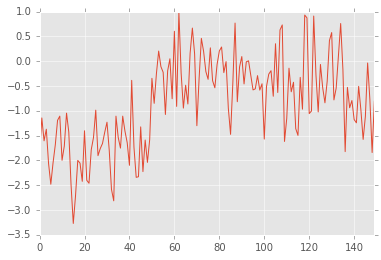

In [29]:
y_logit_Versicolor.plot()

In [30]:
((y_logit_Versicolor >= 0) == (ys.Versicolor == 1)).mean()

0.69999999999999996

In [31]:
((y_logit_Versicolor >= 0) == (ys.Versicolor == 1)).sum()

105

In [32]:
((y_logit_Versicolor >= 0) != (ys.Versicolor == 1)).sum()

45

In [33]:
y_odds_Versicolor = np.exp(y_logit_Versicolor)

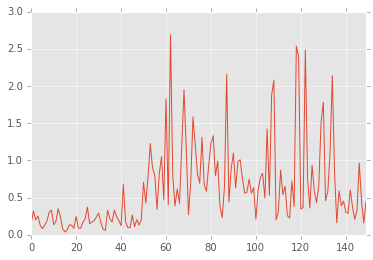

In [34]:
y_odds_Versicolor.plot()

In [35]:
y_p_Versicolor = y_odds_Versicolor / (1 + y_odds_Versicolor)

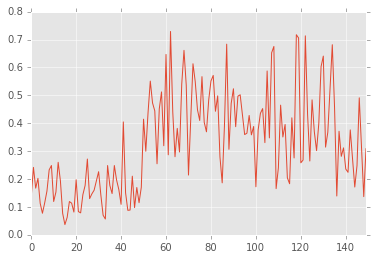

In [60]:
y_p_Versicolor.plot()

In [38]:
y_class_Versicolor = y_p_Versicolor.round()

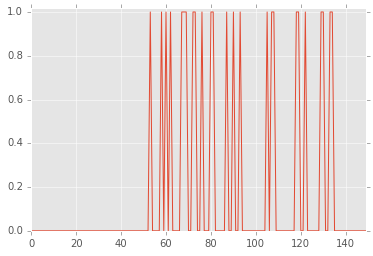

In [64]:
y_class_Versicolor.plot(ylim = (0,1.02))

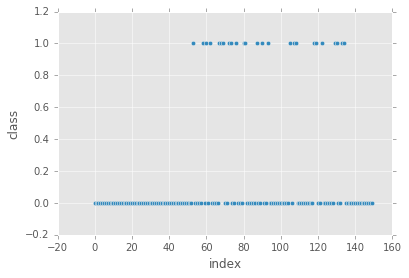

In [40]:
pd.DataFrame({'class': y_class_Versicolor, 'index': y_class_Versicolor.index}).plot(kind = 'scatter', x = 'index', y = 'class')

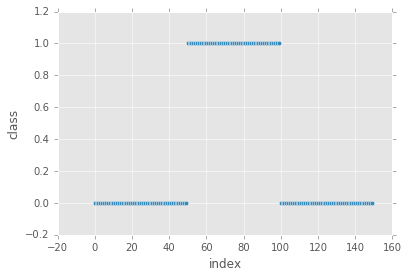

In [41]:
pd.DataFrame({'class': ys.Versicolor, 'index': ys.Versicolor.index}).plot(kind = 'scatter', x = 'index', y = 'class')

## Virginica

### Activity

In [42]:
model_Virginica = linear_model.LogisticRegression()
model_Virginica.fit(X,ys.Virginica)
print model_Virginica.coef_
print model_Virginica.intercept_
print 2.72**model_Virginica.coef_

[[-1.70752515 -1.53426834  2.47097168  2.55538211]]
[-1.21471458]
[[  0.18111844   0.21540446  11.85243153  12.89702686]]


In [43]:
model_Virginica.score(X, ys.Virginica)

0.97999999999999998

In [44]:
y_logit_Virginica = model_Virginica.intercept_ + (X * model_Virginica.coef_[0]).sum(axis = 1)

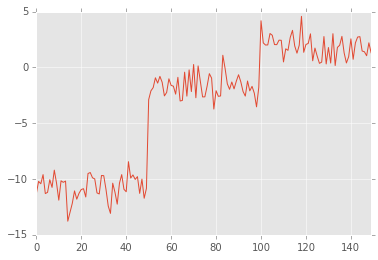

In [45]:
y_logit_Virginica.plot()

In [46]:
((y_logit_Virginica >= 0) == (ys.Virginica == 1)).mean()

0.97999999999999998

In [47]:
((y_logit_Virginica >= 0) == (ys.Virginica == 1)).sum()

147

In [48]:
((y_logit_Virginica >= 0) != (ys.Virginica == 1)).sum()

3

In [49]:
y_odds_Virginica = np.exp(y_logit_Virginica)

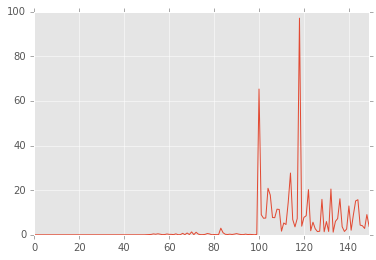

In [50]:
y_odds_Virginica.plot()

In [51]:
y_p_Virginica = y_odds_Virginica / (1 + y_odds_Virginica)

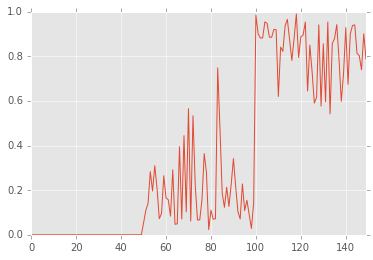

In [52]:
y_p_Virginica.plot()

In [55]:
y_class_Virginica = y_p_Virginica.round()

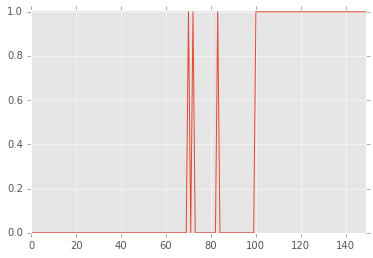

In [59]:
y_class_Virginica.plot(ylim = (0,1.01))

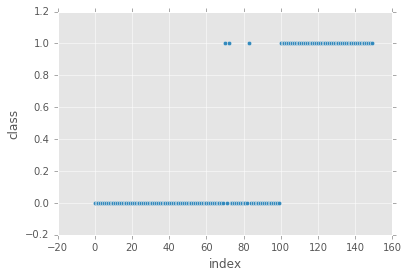

In [57]:
pd.DataFrame({'class': y_class_Virginica, 'index': y_class_Virginica.index}).plot(kind = 'scatter', x = 'index', y = 'class')

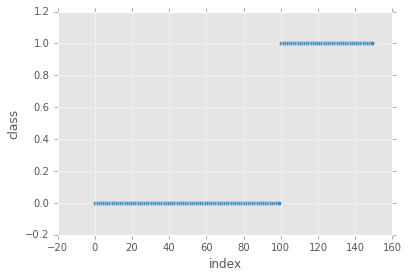

In [58]:
pd.DataFrame({'class': ys.Virginica, 'index': ys.Virginica.index}).plot(kind = 'scatter', x = 'index', y = 'class')

## Activity: Let's combine the models together!

In [65]:
y_hats = pd.DataFrame({'Setosa' : y_class_Setosa, 'Versicolor' : y_class_Versicolor, 'Virginica' : y_class_Virginica})
y_hats

,Setosa,Versicolor,Virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [69]:
y_hats.sum()

Setosa        50.0
Versicolor    25.0
Virginica     53.0
dtype: float64

25.0